In [1]:
import aeromod as mod
import numpy as np

1. ### Import libraries from the textbook

In [2]:
import matplotlib.pyplot as plt

2. ### Problem Set 3.1

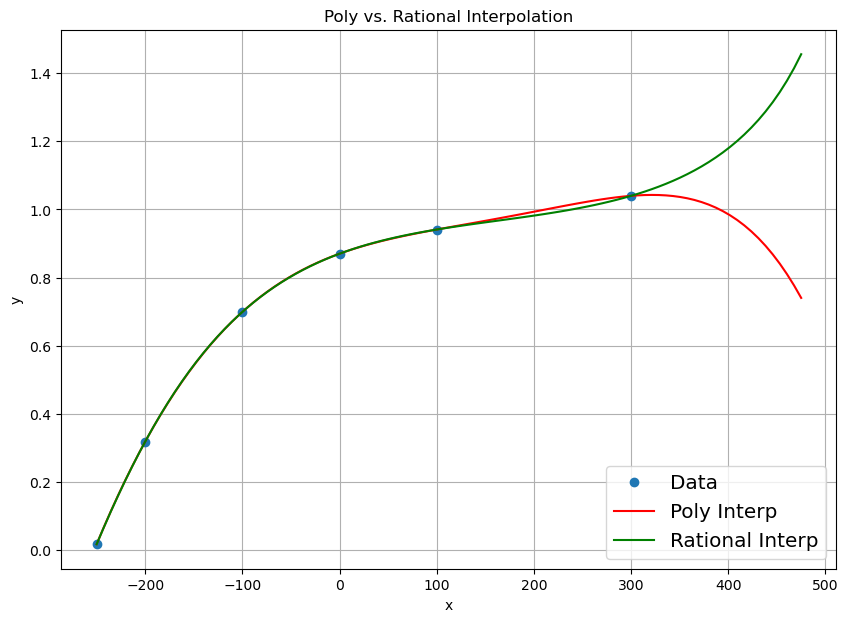

In [3]:
# create datasets for problem 15
xd = np.array([-250., -200., -100., 0., 100., 300.])
yd = np.array([0.0163, 0.318, 0.699, 0.87, 0.941, 1.04])
xT = np.linspace(-250, 475, 100) 

# rational
a = mod.coeffts(xData=xd.copy(), yData=yd.copy())
pNewton = mod.evalPoly(a=a, xData=xd.copy(), x=xT.copy())

pRational = []
for x in xT:
    pRational.append(mod.rational(xData=xd.copy(), yData=yd.copy(), x=x))

# polynomial interpolation
a = mod.coeffts(xData=xd.copy(), yData=yd.copy())

# plot graph with labels
fig, ax = plt.subplots()
ax.plot(xd, yd, 'o', label='Data')
ax.plot(xT, pNewton, 'r', label='Poly Interp')
ax.plot(xT, pRational, 'g', label='Rational Interp')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower right', fontsize='x-large')
ax.set_title('Poly vs. Rational Interpolation')
fig.set_size_inches(10, 7)
ax.grid(True)
plt.show()

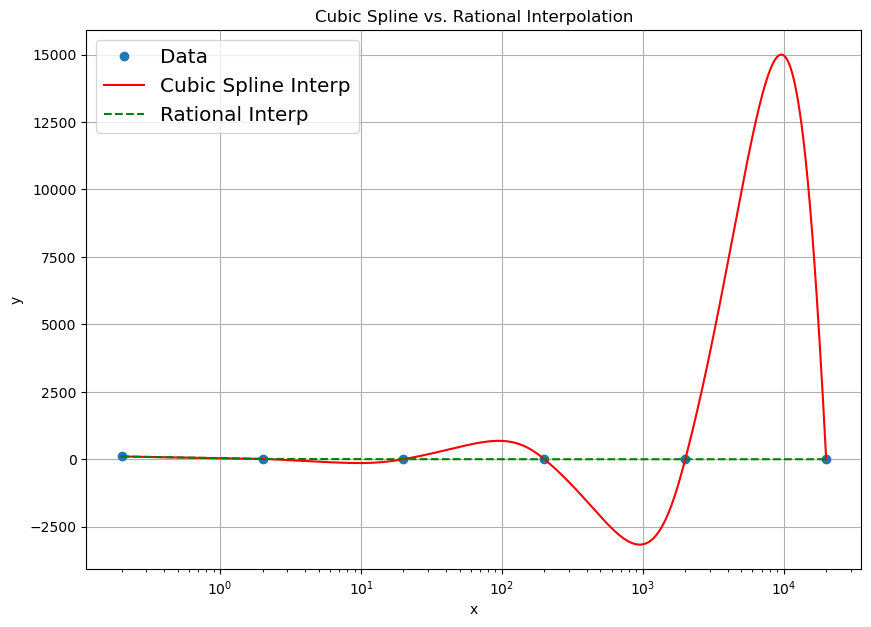

In [4]:
# create datasets for problem 17
xd = np.array([0.2, 2, 20, 200, 2000, 20000])
yd = np.array([103, 13.9, 2.72, 0.800, 0.401, 0.433])
xT = np.linspace(0.2, 20000, 10000) 

# rational interpolation
pRational = []
for x in xT:
    pRational.append(mod.rational(xData=xd.copy(), yData=yd.copy(), x=x))

# cubic spline
k = mod.curvatures(xData=xd.copy(), yData=yd.copy())
y_spline = np.empty(len(xT))
for i in range(0, len(xT)):
    y_spline[i] = (mod.evalSpline(xd.copy(), yd.copy(), k, xT[i]))

# plot graph with labels
fig, ax = plt.subplots()
ax.plot(xd, yd, 'o', label='Data')
ax.plot(xT, y_spline, 'r', label='Cubic Spline Interp')
ax.plot(xT, pRational, '--g', label='Rational Interp')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='upper left', fontsize='x-large')
ax.set_title('Cubic Spline vs. Rational Interpolation')
fig.set_size_inches(10, 7)
ax.grid(True)
plt.xscale('log')

plt.show()

3. ### Problem Set 3.2

Standard Deviation:  0.031622776601683805
Polynomial coefficients:  [-0.02  1.  ]


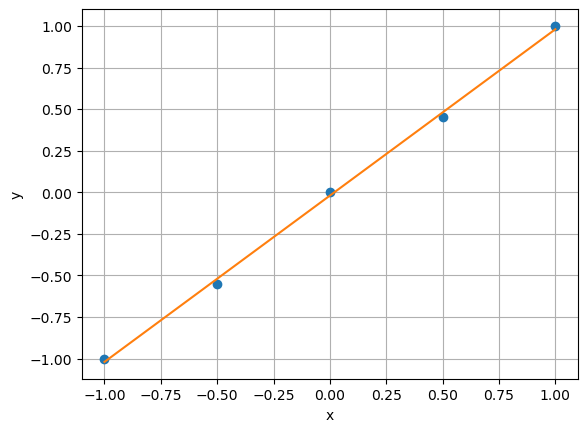

In [5]:
#problem set 3.2 question 2
x = np.array([-1.0, -0.5, 0, 0.5, 1.0], dtype='float64')
y = np.array([-1, -0.55, 0.00, 0.45, 1], dtype='float64')
z = np.linspace(-1, 1, 10)

#polyfit
for i in z:
    c = mod.polyFit(xData=x.copy(), yData=y.copy(), m=1)

stdev = mod.stdDev(c=c, xData=x.copy(), yData=y.copy())
print('Standard Deviation: ', stdev)
print("Polynomial coefficients: ", c)

mod.plotPoly(xData=x.copy(), yData=y.copy(), coeff=c.copy())

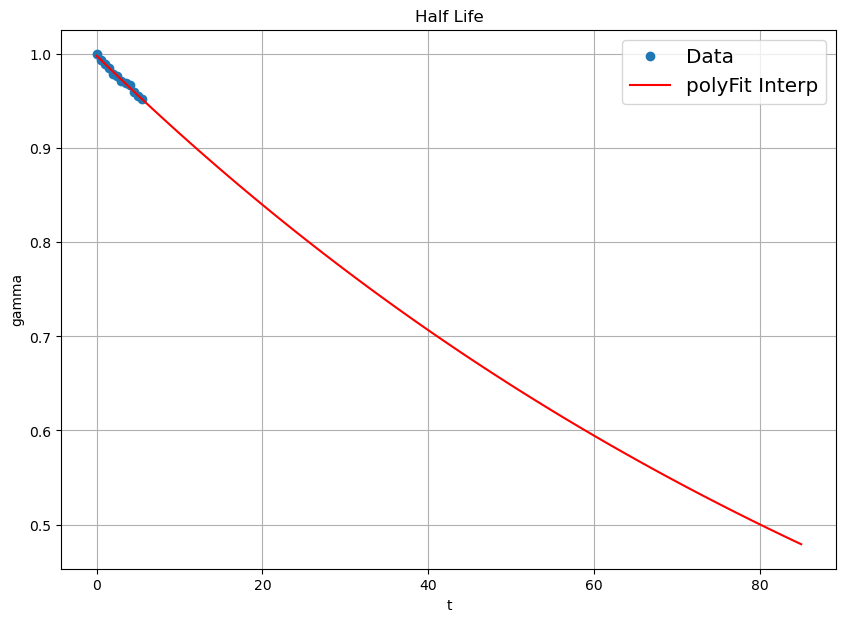

Half life is:  80.22954951498468 years


In [18]:
#problem set  question 16
t = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5], dtype='float64')
gamma = np.array([1, 0.994, 0.99, 0.985, 0.979, 0.977, 0.972, 0.969, 0.967, 0.96, 0.956, 0.952], dtype='float64')
tx = np.linspace(0, 6, 10)

for i in tx:
    c16 = mod.polyFit(t.copy(), np.log(gamma.copy()), m=1)

decay = (c16[1]*-1)
halfLife = (np.log(2))/decay

t2 = np.linspace(0, 85, 100)
gamma2 = np.exp(t2.copy()*c16[1]+c16[0])

# plot graph with labels
fig, ax = plt.subplots()
ax.plot(t, gamma, 'o', label='Data')
ax.plot(t2, gamma2, 'r', label='polyFit Interp')
ax.set_xlabel('t')
ax.set_ylabel('gamma')
ax.legend(loc='upper right', fontsize='x-large')
ax.set_title('Half Life')
fig.set_size_inches(10, 7)
ax.grid(True)
plt.show()
print('Half life is: ', halfLife, 'years')